#**Stunting Classification with Random Forest and Logistic Regression**

---



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
!ls

sample_data


# **Import Dataset**

In [ ]:
# from google.colab import files
# uploaded = files.upload()

!gdown 1U4rB8x2uZcvV9MEOB3qYPBa1LzaObUi6

Downloading...
From: https://drive.google.com/uc?id=1U4rB8x2uZcvV9MEOB3qYPBa1LzaObUi6
To: /content/Data Stunting.xlsx
100% 300k/300k [00:00<00:00, 4.76MB/s]


In [ ]:
# Impor dataset dari file Excel
df = pd.read_excel('Data Stunting.xlsx')

In [ ]:
# Call dataset
df

,Nama,JK,Usia,Berat,Tinggi,Status
0,FAISAL FAKIH RUKMANA,L,2.466667,4.9,58,Tidak Stunting
1,MUHAMMAD HAFIDZ ATHAFARIZ S,L,58.466667,17.0,109,Tidak Stunting
2,VIONA FEBBY YASMIN,P,5.166667,7.1,68.5,Tidak Stunting
3,GHEGHE KALISTA PUTRI,P,45.300000,13.8,95,Tidak Stunting
4,LINGGA OKTAVIAN WIRATAMA,L,53.633333,18.6,106,Tidak Stunting
...,...,...,...,...,...,...
6672,KAUTSARRAKY,L,0.000000,3.0,50,Tidak Stunting
6673,ALEENA H,P,0.000000,3.0,50,Tidak Stunting
6674,M EMRAN,L,0.000000,3.0,50,Stunting
6675,REZVAN A P,L,0.000000,3.0,50,Tidak Stunting


# **Data Cleaning**

In [ ]:
# Check Missing Value
nan_data = df[df.isna().any(axis=1)]
nan_data

,Nama,JK,Usia,Berat,Tinggi,Status


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Nama      0
JK        0
Usia      0
Berat     0
Tinggi    0
Status    0
dtype: int64


In [ ]:
# Mengecek adakah mixed value
df.dtypes

Nama       object
JK         object
Usia      float64
Berat     float64
Tinggi     object
Status     object
dtype: object

In [ ]:
# Mengecek baris mana yang tidak bertipe float pada kolom Tinggi
non_float_rows = df[~df['Tinggi'].apply(lambda x: isinstance(x, float))]
print(non_float_rows)

                              Nama  JK       Usia  Berat Tinggi  \
0            FAISAL FAKIH RUKMANA   L    2.466667    4.9     58   
1     MUHAMMAD HAFIDZ ATHAFARIZ S   L   58.466667   17.0    109   
3            GHEGHE KALISTA PUTRI   P   45.300000   13.8     95   
4        LINGGA OKTAVIAN WIRATAMA   L   53.633333   18.6    106   
6              ASTI RAHMA SAPITRI   P   59.533333   18.5    107   
...                            ...  ..        ...    ...    ...   
6672                  KAUTSARRAKY   L    0.000000    3.0     50   
6673                     ALEENA H   P    0.000000    3.0     50   
6674                      M EMRAN   L    0.000000    3.0     50   
6675                   REZVAN A P   L    0.000000    3.0     50   
6676     APRIANZA QEISYAM GUNAWAN   L    0.000000    2.8     48   

              Status  
0     Tidak Stunting  
1     Tidak Stunting  
3     Tidak Stunting  
4     Tidak Stunting  
6     Tidak Stunting  
...              ...  
6672  Tidak Stunting  
6673  Tidak

In [ ]:
df['Tinggi'] = df['Tinggi'].fillna('')

In [ ]:
# Ketika diconvert ke float error, ternyata terdapat baris yang mengandung (-)
strip_rows = df[df['Tinggi'].astype(str).str.contains('-')]
print(strip_rows)

                  Nama  JK       Usia  Berat Tinggi          Status
2087  ARKENZY ZAVIYAR   L   37.633333   13.4      -  Tidak Stunting


In [ ]:
df = df.drop(2087)

In [ ]:
df['Tinggi'] = df['Tinggi'].astype(float)
print(df['Tinggi'].dtype)

float64


In [ ]:
df

,Nama,JK,Usia,Berat,Tinggi,Status
0,FAISAL FAKIH RUKMANA,L,2.466667,4.9,58.0,Tidak Stunting
1,MUHAMMAD HAFIDZ ATHAFARIZ S,L,58.466667,17.0,109.0,Tidak Stunting
2,VIONA FEBBY YASMIN,P,5.166667,7.1,68.5,Tidak Stunting
3,GHEGHE KALISTA PUTRI,P,45.300000,13.8,95.0,Tidak Stunting
4,LINGGA OKTAVIAN WIRATAMA,L,53.633333,18.6,106.0,Tidak Stunting
...,...,...,...,...,...,...
6672,KAUTSARRAKY,L,0.000000,3.0,50.0,Tidak Stunting
6673,ALEENA H,P,0.000000,3.0,50.0,Tidak Stunting
6674,M EMRAN,L,0.000000,3.0,50.0,Stunting
6675,REZVAN A P,L,0.000000,3.0,50.0,Tidak Stunting


In [ ]:
# Menghapus kolom yang tidak dibutuhkan
df = df.drop(['Nama'], axis=1)
df

,JK,Usia,Berat,Tinggi,Status
0,L,2.466667,4.9,58.0,Tidak Stunting
1,L,58.466667,17.0,109.0,Tidak Stunting
2,P,5.166667,7.1,68.5,Tidak Stunting
3,P,45.300000,13.8,95.0,Tidak Stunting
4,L,53.633333,18.6,106.0,Tidak Stunting
...,...,...,...,...,...
6672,L,0.000000,3.0,50.0,Tidak Stunting
6673,P,0.000000,3.0,50.0,Tidak Stunting
6674,L,0.000000,3.0,50.0,Stunting
6675,L,0.000000,3.0,50.0,Tidak Stunting


# Data Visualization

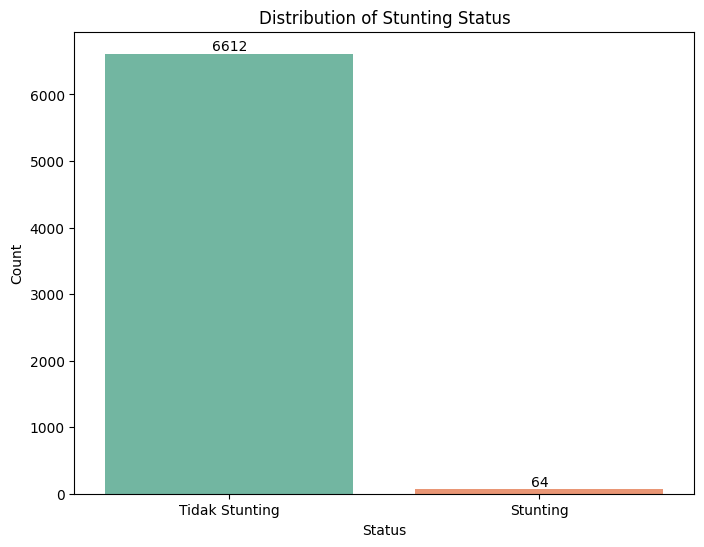

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame named 'df'
# If not, you can load it with: df = pd.read_excel('Data Stunting.xlsx')

# Create a bar plot for the 'Status' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Distribution of Stunting Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Display the count on top of each bar
for index, value in enumerate(df['Status'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


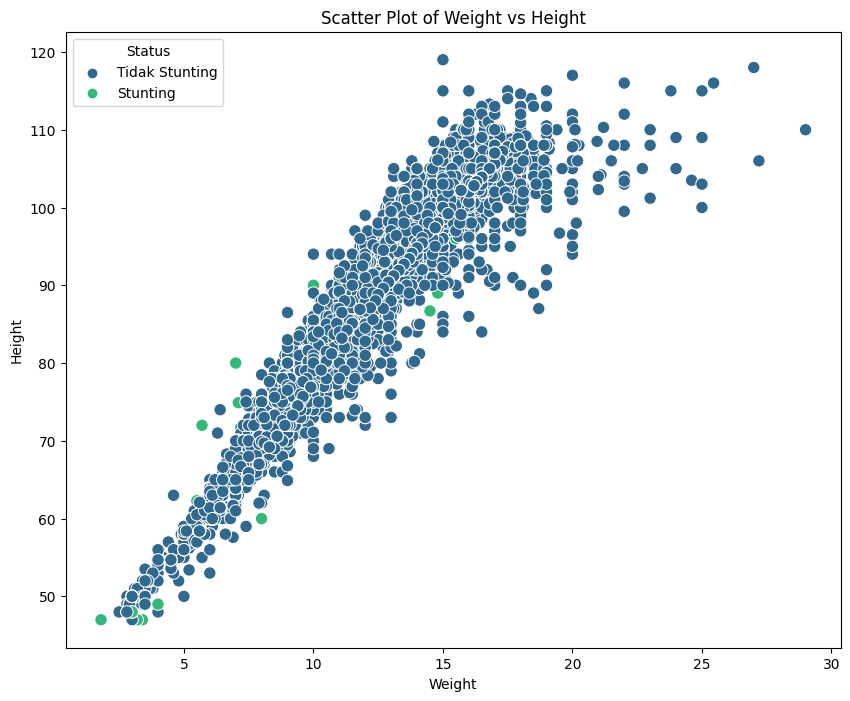

In [ ]:
# Scatter plot for 'Berat' vs 'Tinggi' with different colors for each 'Status'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Berat', y='Tinggi', hue='Status', data=df, palette='viridis', s=80)
plt.title('Scatter Plot of Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.legend(title='Status')
plt.show()

# **Data Processing**

**1. Mengecek Kemungkinan Imbalance Data**

In [ ]:
min_label_len = len(df[df['Status']=='Stunting'])
print(min_label_len)

64


In [ ]:
max_label_index = df[df['Status']=='Tidak Stunting'].index
print(max_label_index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6664, 6665, 6667, 6669, 6670, 6671, 6672, 6673, 6675, 6676],
           dtype='int64', length=6612)


In [ ]:
# Terjadi imbalance karena stunting sebanyak 64 data sedangkan tidak stunting 6612 data

**2. Undersampling**

In [ ]:
# # Melakukan undersampling pada label yang terbesar
# random_max_index = np.random.choice(max_label_index,
#                                     min_label_len,
#                                     replace=False)
# print(len(random_max_index))

In [ ]:
# min_label_index = df[df['Status']=='Stunting'].index
# print(min_label_index)

In [ ]:
# under_sample_index = np.concatenate([min_label_index, random_max_index])
# under_sample = df.loc[under_sample_index]
# print(under_sample_index)

# # Menentukan fitur dan label
# x = under_sample.loc[:, df.columns != 'Status']
# y = under_sample.loc[:, df.columns == 'Status']

In [ ]:
# print(x)

In [ ]:
# print(y)

**3. Oversample**

In [ ]:
pip install pandas scikit-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

x = df.drop('Status', axis=1)
y = df['Status']

# Display class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Apply oversampling
oversampler = RandomOverSampler()
x_resampled, y_resampled = oversampler.fit_resample(x, y)

# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))


Class distribution before oversampling: Counter({'Tidak Stunting': 6612, 'Stunting': 64})
Class distribution after oversampling: Counter({'Tidak Stunting': 6612, 'Stunting': 6612})


In [ ]:
# Combine the oversampled features and labels into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.Series(y_resampled, name='Status')], axis=1)

# # Save the oversampled dataset to a new CSV file
# df_resampled.to_csv('path/to/oversampled/dataset.csv', index=False)


In [ ]:
df_resampled

,JK,Usia,Berat,Tinggi,Status
0,L,2.466667,4.9,58.0,Tidak Stunting
1,L,58.466667,17.0,109.0,Tidak Stunting
2,P,5.166667,7.1,68.5,Tidak Stunting
3,P,45.300000,13.8,95.0,Tidak Stunting
4,L,53.633333,18.6,106.0,Tidak Stunting
...,...,...,...,...,...
13219,L,0.000000,3.0,48.0,Stunting
13220,P,26.500000,9.0,80.0,Stunting
13221,L,11.400000,8.0,70.0,Stunting
13222,P,28.000000,7.0,80.0,Stunting


In [ ]:
min_label_len = len(df_resampled[df_resampled['Status']=='Stunting'])
print(min_label_len)

6612


In [ ]:
max_label_index = df_resampled[df_resampled['Status']=='Tidak Stunting'].index
print(max_label_index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6663, 6664, 6666, 6668, 6669, 6670, 6671, 6672, 6674, 6675],
           dtype='int64', length=6612)


In [ ]:
print(x_resampled)

       JK       Usia  Berat  Tinggi
0      L    2.466667    4.9    58.0
1      L   58.466667   17.0   109.0
2      P    5.166667    7.1    68.5
3      P   45.300000   13.8    95.0
4      L   53.633333   18.6   106.0
...    ..        ...    ...     ...
13219  L    0.000000    3.0    48.0
13220  P   26.500000    9.0    80.0
13221  L   11.400000    8.0    70.0
13222  P   28.000000    7.0    80.0
13223  P   44.766667   12.0    86.0

[13224 rows x 4 columns]


In [ ]:
print(y_resampled)

0        Tidak Stunting
1        Tidak Stunting
2        Tidak Stunting
3        Tidak Stunting
4        Tidak Stunting
              ...      
13219          Stunting
13220          Stunting
13221          Stunting
13222          Stunting
13223          Stunting
Name: Status, Length: 13224, dtype: object


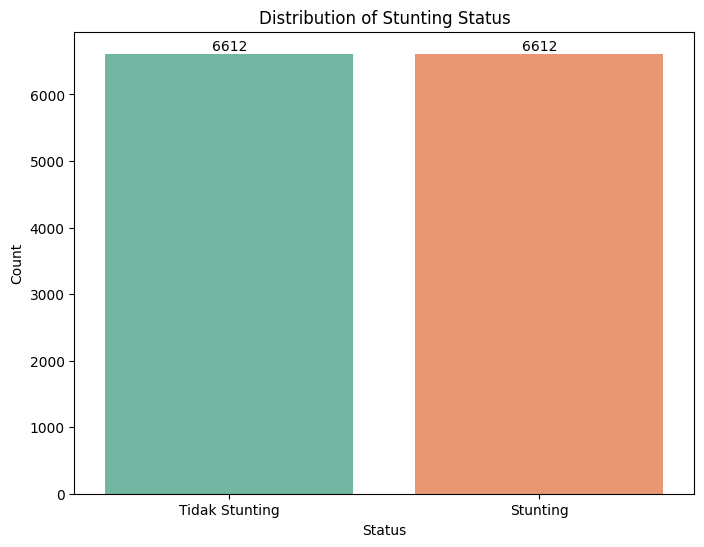

In [ ]:
# Create a bar plot for the 'Status' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df_resampled, palette='Set2')
plt.title('Distribution of Stunting Status')
plt.xlabel('Status')
plt.ylabel('Count')

# Display the count on top of each bar
for index, value in enumerate(df_resampled['Status'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

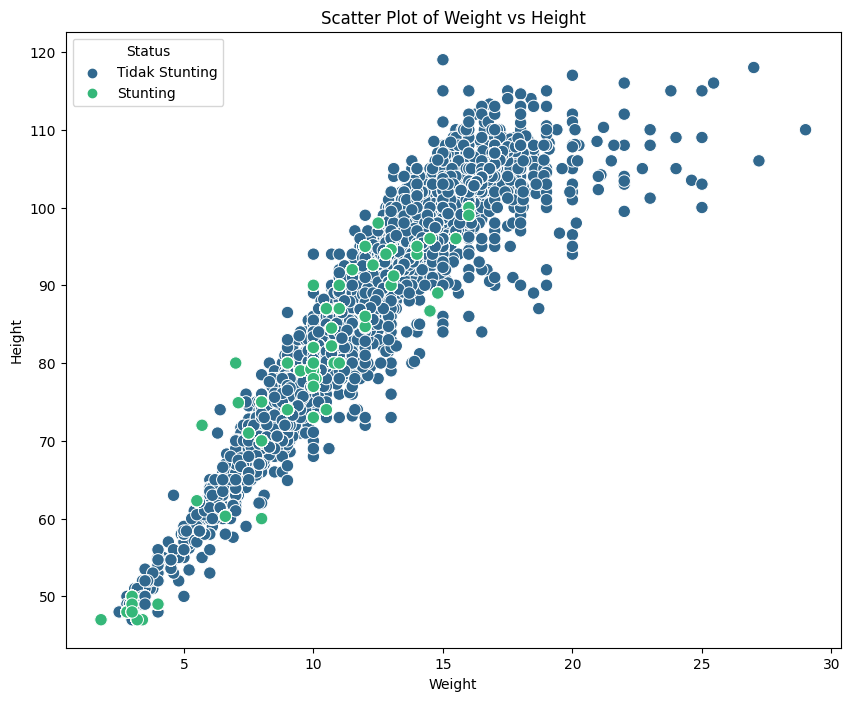

In [ ]:
# Scatter plot for 'Berat' vs 'Tinggi' with different colors for each 'Status'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Berat', y='Tinggi', hue='Status', data=df_resampled, palette='viridis', s=80)
plt.title('Scatter Plot of Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.legend(title='Status')
plt.show()

# TRANSFORMASI

In [ ]:
# TRANSFORMASI & ENCODING Kolom Fitur
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x_resampled = np.array(column_transformer.fit_transform(x_resampled))

In [ ]:
print(x_resampled)

[[  1.           0.           2.46666667   4.9         58.        ]
 [  1.           0.          58.46666667  17.         109.        ]
 [  0.           1.           5.16666667   7.1         68.5       ]
 ...
 [  1.           0.          11.4          8.          70.        ]
 [  0.           1.          28.           7.          80.        ]
 [  0.           1.          44.76666667  12.          86.        ]]


In [ ]:
# ENCODING pada Kolom Label
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_resampled = label_encoder.fit_transform(y_resampled)

y_resampled = 1 - y_resampled

In [ ]:
print(y_resampled[:1000])
# y_resampled[-1:-501:-1]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

**3. Split Data**

In [ ]:
# Split train set dan Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

**4. Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scal = StandardScaler()

# Fit and transform the training set
x_train[:, 2:] = standard_scal.fit_transform(x_train[:, 2:])

# Transform the test set using the same scaler
x_test[:, 2:] = standard_scal.transform(x_test[:, 2:])

In [ ]:
print(x_train)

[[ 0.          1.          0.17642639  0.49296582  0.52774009]
 [ 1.          0.         -0.9562778  -0.4410806  -0.44023918]
 [ 0.          1.         -0.08214663 -0.3076454  -0.37570723]
 ...
 [ 1.          0.          1.18949232  0.22609541  0.72133595]
 [ 1.          0.          0.63761259  0.33284358  0.52774009]
 [ 0.          1.         -0.22108138 -0.5745158  -0.24664333]]


In [ ]:
print(x_train.shape)
print(y_train.shape)

(10579, 5)
(10579,)


# **Model**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Create a logistic regression model
logistic_model  = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000, class_weight='balanced')

# Fit the model to the training data
logistic_model.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)

In [ ]:
# Training Accuracy
y_pred_train_logistic = logistic_model.predict(x_train)

# Calculate training set accuracy
accuracy_train = accuracy_score(y_train, y_pred_train_logistic)
print(f"Training Set Accuracy: {accuracy_train:.4f}")

Training Set Accuracy: 0.8862


In [ ]:
# Make predictions on the test set
y_pred_logistic  = logistic_model.predict(x_test)

# Calculate accuracy
accuracy_logistic  = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy_logistic:.4f}")

# Generate a classification report
print(classification_report(y_test, y_pred_logistic, digits=4))

# Create a confusion matrix
confusion_logistic  = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:")
print(confusion_logistic )


Accuracy: 0.8915
              precision    recall  f1-score   support

           0     0.9090    0.8648    0.8863      1294
           1     0.8762    0.9171    0.8962      1351

    accuracy                         0.8915      2645
   macro avg     0.8926    0.8909    0.8913      2645
weighted avg     0.8923    0.8915    0.8914      2645

Confusion Matrix:
[[1119  175]
 [ 112 1239]]


## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = 25,max_features = 'log2',n_estimators = 150) #n_estimators=100, max_depth=10, min_samples_split=500, min_samples_leaf=200

# Fit the model to the training data
rf_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, max_features='log2',
                       n_estimators=150)

In [ ]:
# Training Accuracy
y_pred_train_rf = rf_model.predict(x_train)

# Calculate training set accuracy
accuracy_train = accuracy_score(y_train, y_pred_train_rf)
print(f"Training Set Accuracy: {accuracy_train:.4f}")

Training Set Accuracy: 0.9991


In [ ]:
# Make predictions on the test set
y_pred_rf  = rf_model.predict(x_test)

# Calculate accuracy
accuracy_rf  = accuracy_score(y_test, y_pred_rf )
print(f"Accuracy: {accuracy_rf :.4f}")

# Generate a classification report
print(classification_report(y_test, y_pred_rf, digits=4))

# Create a confusion matrix
confusion_rf  = confusion_matrix(y_test, y_pred_rf )
print("Confusion Matrix:")
print(confusion_rf )


Accuracy: 0.9992
              precision    recall  f1-score   support

           0     1.0000    0.9985    0.9992      1294
           1     0.9985    1.0000    0.9993      1351

    accuracy                         0.9992      2645
   macro avg     0.9993    0.9992    0.9992      2645
weighted avg     0.9992    0.9992    0.9992      2645

Confusion Matrix:
[[1292    2]
 [   0 1351]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your feature matrix and target variable
# Perform the loop for 10 iterations (you can adjust this number)
num_iterations = 10
average_metrics = {'accuracy': 0, 'precision_0': 0, 'recall_0': 0, 'f1_0': 0, 'precision_1': 0, 'recall_1': 0, 'f1_1': 0}

for i in range(num_iterations):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2)  # You may set a random seed for reproducibility

    # Train your model (assuming RandomForestClassifier for this example)
    # Create a Random Forest Classifier model
    rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = 25,max_features = 'log2',n_estimators = 150) #n_estimators=100, max_depth=10, min_samples_split=500, min_samples_leaf=200

    # Fit the model to the training data
    rf_model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_rf  = rf_model.predict(x_test)

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, y_pred_rf)
    report = classification_report(y_test, y_pred_rf, output_dict=True)

    # Print accuracy for each iteration
    print(f"Iteration {i + 1} - Accuracy: {accuracy:.4f}")

    # Accumulate metrics for averaging
    average_metrics['accuracy'] += accuracy
    average_metrics['precision_0'] += report['0']['precision']
    average_metrics['recall_0'] += report['0']['recall']
    average_metrics['f1_0'] += report['0']['f1-score']
    average_metrics['precision_1'] += report['1']['precision']
    average_metrics['recall_1'] += report['1']['recall']
    average_metrics['f1_1'] += report['1']['f1-score']

# Calculate average metrics
for metric in average_metrics:
    average_metrics[metric] /= num_iterations

# Print the average metrics
print("\nOverall Average Metrics:")
print("Average Accuracy:", average_metrics['accuracy'])
print("Average Precision (Class 0):", average_metrics['precision_0'])
print("Average Recall (Class 0):", average_metrics['recall_0'])
print("Average F1-Score (Class 0):", average_metrics['f1_0'])
print("Average Precision (Class 1):", average_metrics['precision_1'])
print("Average Recall (Class 1):", average_metrics['recall_1'])
print("Average F1-Score (Class 1):", average_metrics['f1_1'])


Iteration 1 - Accuracy: 0.9996
Iteration 2 - Accuracy: 0.9985
Iteration 3 - Accuracy: 0.9989
Iteration 4 - Accuracy: 0.9981
Iteration 5 - Accuracy: 0.9985
Iteration 6 - Accuracy: 0.9977
Iteration 7 - Accuracy: 0.9989
Iteration 8 - Accuracy: 0.9992
Iteration 9 - Accuracy: 0.9985
Iteration 10 - Accuracy: 0.9974

Overall Average Metrics:
Average Accuracy: 0.9985255198487712
Average Precision (Class 0): 1.0
Average Recall (Class 0): 0.9970568583637294
Average F1-Score (Class 0): 0.9985258618008608
Average Precision (Class 1): 0.9970545129099992
Average Recall (Class 1): 1.0
Average F1-Score (Class 1): 0.9985246562034377


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming X and y are your feature matrix and target variable
# Perform the loop for 10 iterations (you can adjust this number)
num_iterations = 100
average_metrics_rf = {'accuracy': 0, 'precision_0': 0, 'recall_0': 0, 'f1_0': 0, 'precision_1': 0, 'recall_1': 0, 'f1_1': 0}
average_metrics_lr = {'accuracy': 0, 'precision_0': 0, 'recall_0': 0, 'f1_0': 0, 'precision_1': 0, 'recall_1': 0, 'f1_1': 0}

for i in range(num_iterations):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2)  # You may set a random seed for reproducibility

    # Scaling data
    standard_scal = StandardScaler()
    # Fit and transform the training set
    x_train[:, 2:] = standard_scal.fit_transform(x_train[:, 2:])
    # Transform the test set using the same scaler
    x_test[:, 2:] = standard_scal.transform(x_test[:, 2:])

    # Train RandomForestClassifier
    rf_model = RandomForestClassifier()
    rf_model.fit(x_train, y_train)

    # Make predictions on the test set using RandomForestClassifier
    y_pred_rf = rf_model.predict(x_test)

    # Calculate accuracy and other metrics for RandomForestClassifier
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

    # Print accuracy for each iteration for RandomForestClassifier
    print(f"Iteration {i + 1} - RandomForest - Accuracy: {accuracy_rf:.4f}")

    # Accumulate metrics for averaging for RandomForestClassifier
    average_metrics_rf['accuracy'] += accuracy_rf
    average_metrics_rf['precision_0'] += report_rf['0']['precision']
    average_metrics_rf['recall_0'] += report_rf['0']['recall']
    average_metrics_rf['f1_0'] += report_rf['0']['f1-score']
    average_metrics_rf['precision_1'] += report_rf['1']['precision']
    average_metrics_rf['recall_1'] += report_rf['1']['recall']
    average_metrics_rf['f1_1'] += report_rf['1']['f1-score']

    # Train LogisticRegression
    lr_model = LogisticRegression()
    lr_model.fit(x_train, y_train)

    # Make predictions on the test set using LogisticRegression
    y_pred_lr = lr_model.predict(x_test)

    # Calculate accuracy and other metrics for LogisticRegression
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

    # Print accuracy for each iteration for LogisticRegression
    print(f"Iteration {i + 1} - LogisticRegression - Accuracy: {accuracy_lr:.4f}")

    # Accumulate metrics for averaging for LogisticRegression
    average_metrics_lr['accuracy'] += accuracy_lr
    average_metrics_lr['precision_0'] += report_lr['0']['precision']
    average_metrics_lr['recall_0'] += report_lr['0']['recall']
    average_metrics_lr['f1_0'] += report_lr['0']['f1-score']
    average_metrics_lr['precision_1'] += report_lr['1']['precision']
    average_metrics_lr['recall_1'] += report_lr['1']['recall']
    average_metrics_lr['f1_1'] += report_lr['1']['f1-score']

# Calculate average metrics for RandomForestClassifier
for metric in average_metrics_rf:
    average_metrics_rf[metric] /= num_iterations

# Calculate average metrics for LogisticRegression
for metric in average_metrics_lr:
    average_metrics_lr[metric] /= num_iterations

# Print the overall average metrics for RandomForestClassifier
print("\nOverall Average Metrics for RandomForestClassifier:")
print("Average Accuracy: {:.3f}".format(average_metrics_rf['accuracy']))
print("Average Precision (Class 0): {:.3f}".format(average_metrics_rf['precision_0']))
print("Average Recall (Class 0): {:.3f}".format(average_metrics_rf['recall_0']))
print("Average F1-Score (Class 0): {:.3f}".format(average_metrics_rf['f1_0']))
print("Average Precision (Class 1): {:.3f}".format(average_metrics_rf['precision_1']))
print("Average Recall (Class 1): {:.3f}".format(average_metrics_rf['recall_1']))
print("Average F1-Score (Class 1): {:.3f}".format(average_metrics_rf['f1_1']))

# Print the overall average metrics for LogisticRegression
print("\nOverall Average Metrics for LogisticRegression:")
print("Average Accuracy: {:.3f}".format(average_metrics_lr['accuracy']))
print("Average Precision (Class 0): {:.3f}".format(average_metrics_lr['precision_0']))
print("Average Recall (Class 0): {:.3f}".format(average_metrics_lr['recall_0']))
print("Average F1-Score (Class 0): {:.3f}".format(average_metrics_lr['f1_0']))
print("Average Precision (Class 1): {:.3f}".format(average_metrics_lr['precision_1']))
print("Average Recall (Class 1): {:.3f}".format(average_metrics_lr['recall_1']))
print("Average F1-Score (Class 1): {:.3f}".format(average_metrics_lr['f1_1']))


Iteration 1 - RandomForest - Accuracy: 0.9992
Iteration 1 - LogisticRegression - Accuracy: 0.8926
Iteration 2 - RandomForest - Accuracy: 0.9985
Iteration 2 - LogisticRegression - Accuracy: 0.8953
Iteration 3 - RandomForest - Accuracy: 0.9970
Iteration 3 - LogisticRegression - Accuracy: 0.8911
Iteration 4 - RandomForest - Accuracy: 0.9977
Iteration 4 - LogisticRegression - Accuracy: 0.9017
Iteration 5 - RandomForest - Accuracy: 0.9977
Iteration 5 - LogisticRegression - Accuracy: 0.8900
Iteration 6 - RandomForest - Accuracy: 0.9981
Iteration 6 - LogisticRegression - Accuracy: 0.8836
Iteration 7 - RandomForest - Accuracy: 0.9985
Iteration 7 - LogisticRegression - Accuracy: 0.8938
Iteration 8 - RandomForest - Accuracy: 0.9989
Iteration 8 - LogisticRegression - Accuracy: 0.8790
Iteration 9 - RandomForest - Accuracy: 0.9974
Iteration 9 - LogisticRegression - Accuracy: 0.8896
Iteration 10 - RandomForest - Accuracy: 0.9974
Iteration 10 - LogisticRegression - Accuracy: 0.9013
Iteration 11 - Ran

In [ ]:
print(x_train)

[[ 1.          0.         -1.36576354 -0.83672899 -0.88814205]
 [ 1.          0.         -1.75785182 -2.16979346 -2.30656039]
 [ 0.          1.         -1.75785182 -2.16979346 -2.30656039]
 ...
 [ 0.          1.         -0.53716319 -0.03689031  0.40132918]
 [ 0.          1.         -1.75785182 -2.19645475 -2.24208683]
 [ 1.          0.         -1.75785182 -2.16979346 -2.17761327]]
